In [22]:
!pip install numpy matplotlib pandas tqdm

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Huawei\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [23]:
import json

import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import ticker

In [ ]:
with open("bench.json", encoding="utf-8") as f:
    data = json.load(f)

pd.set_option('display.max_rows', 1000)

data = [{**v, **v["tests"][0]} for v in data]
for v in data:
    del v["tests"]
    if "mnk" in v:
        v["n"] = v["mnk"][0]

data_df = pd.DataFrame(data)
data_df.sort_values(by="gflops", ascending=False)

data_df = data_df[data_df["mnk"].notnull()]

In [25]:
data_cpu = data_df[data_df["runtime"].isin(["OpenMP", "OpenBLAS"])]
data_cpu_float = data_cpu[data_cpu["dtype"] == "float"]
data_cpu_double = data_cpu[data_cpu["dtype"] == "double"]

data_cpu_float.sort_values(by="gflops", ascending=False)

,cpu,dtype,n,range,seed,gflops,result,runtime,version,block_size,gpu,grid_size,mnk
729,NaN,float,32,"[-1.0, 1.0]",42,4.398389,-36.645473,OpenMP,NaN,NaN,NaN,NaN,"[32, 32, 32]"
721,NaN,float,32,"[-1.0, 1.0]",42,4.369067,-36.645473,OpenMP,NaN,NaN,NaN,NaN,"[32, 32, 32]"
727,NaN,float,32,"[-1.0, 1.0]",42,4.369067,-36.645473,OpenMP,NaN,NaN,NaN,NaN,"[32, 32, 32]"
740,NaN,float,32,"[-1.0, 1.0]",42,4.369067,-36.645473,OpenBLAS,NaN,NaN,NaN,NaN,"[32, 32, 32]"
741,NaN,float,32,"[-1.0, 1.0]",42,4.369067,-36.645473,OpenBLAS,NaN,NaN,NaN,NaN,"[32, 32, 32]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,NaN,float,1024,"[-1.0, 1.0]",42,0.339497,-17401.222656,OpenMP,NaN,NaN,NaN,NaN,"[1024, 1024, 1024]"
925,NaN,float,1024,"[-1.0, 1.0]",42,0.339388,-17401.222656,OpenMP,NaN,NaN,NaN,NaN,"[1024, 1024, 1024]"
923,NaN,float,1024,"[-1.0, 1.0]",42,0.339278,-17401.222656,OpenMP,NaN,NaN,NaN,NaN,"[1024, 1024, 1024]"
921,NaN,float,1024,"[-1.0, 1.0]",42,0.339247,-17401.222656,OpenMP,NaN,NaN,NaN,NaN,"[1024, 1024, 1024]"


In [26]:
data_gpu = data_df[data_df["runtime"].isin(["OpenCL", "CUDA", "cuBLAS", "CLBlast"])]
data_gpu_float = data_gpu[data_gpu["dtype"] == "float"]
data_gpu_double = data_gpu[data_gpu["dtype"] == "double"]

data_gpu_float.sort_values(by="gflops", ascending=False)

,cpu,dtype,n,range,seed,gflops,result,runtime,version,block_size,gpu,grid_size,mnk
1429,NaN,float,8192,"[-1.0, 1.0]",42,1623.603285,-1.802608e+05,CLBlast,NaN,NaN,NaN,NaN,"[8192, 8192, 8192]"
1424,NaN,float,8192,"[-1.0, 1.0]",42,1613.937650,-1.802608e+05,CLBlast,NaN,NaN,NaN,NaN,"[8192, 8192, 8192]"
1423,NaN,float,8192,"[-1.0, 1.0]",42,1591.210214,-1.802608e+05,CLBlast,NaN,NaN,NaN,NaN,"[8192, 8192, 8192]"
1420,NaN,float,8192,"[-1.0, 1.0]",42,1583.829014,-1.802608e+05,CLBlast,NaN,NaN,NaN,NaN,"[8192, 8192, 8192]"
1422,NaN,float,8192,"[-1.0, 1.0]",42,1581.440477,-1.802608e+05,CLBlast,NaN,NaN,NaN,NaN,"[8192, 8192, 8192]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,AMD Ryzen 9 3900X 12-Core Processor,float,16384,"[-1.0, 1.0]",42,0.000000,1.526643e+06,cuBLAS,NaN,NaN,NVIDIA GeForce RTX 2060,NaN,"[16384, 16384, 16384]"
1546,AMD Ryzen 9 3900X 12-Core Processor,float,16384,"[-1.0, 1.0]",42,0.000000,1.526643e+06,cuBLAS,NaN,NaN,NVIDIA GeForce RTX 2060,NaN,"[16384, 16384, 16384]"
1547,AMD Ryzen 9 3900X 12-Core Processor,float,16384,"[-1.0, 1.0]",42,0.000000,1.526643e+06,cuBLAS,NaN,NaN,NVIDIA GeForce RTX 2060,NaN,"[16384, 16384, 16384]"
1548,AMD Ryzen 9 3900X 12-Core Processor,float,16384,"[-1.0, 1.0]",42,0.000000,1.526643e+06,cuBLAS,NaN,NaN,NVIDIA GeForce RTX 2060,NaN,"[16384, 16384, 16384]"


In [27]:

def plot_bench(data_df, xlabel="n", ylabel="gflops", xtitle="N", ytitle="GFLOPS", figsize=None):
    groups = data_df.groupby("runtime")
    
    fig, axes = plt.subplots(nrows=1, ncols=len(groups), figsize=figsize)

    for i, (runtime, group) in enumerate(groups):
        # subgroups = group.groupby("dtype")
        # for j, (dtype, subgroup) in enumerate(subgroups):
        group = group.groupby(xlabel, as_index=False).mean(numeric_only=True)
        ax = axes[i]
        ax.plot(
            group[xlabel], 
            group[ylabel],
            marker="o",
            markersize=6,
            label=runtime,
        )
        ax.set_title(runtime)
        ax.set_xlabel(xtitle, labelpad=8)
        ax.set_ylabel(ytitle, labelpad=8)
        ax.tick_params("x", rotation=90)
        # def fmt_two_digits(x, pos):
        #     return str(group[xlabel][pos])
        # ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_two_digits))

    plt.tight_layout()
    plt.show()

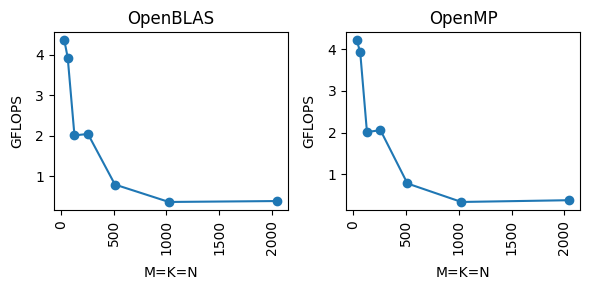

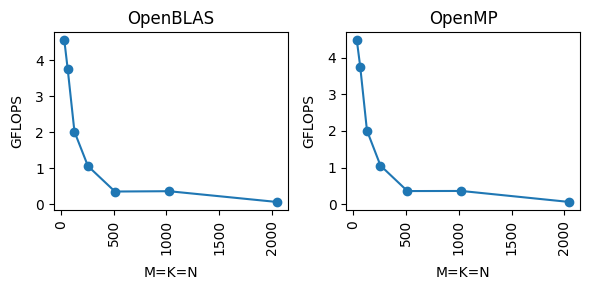

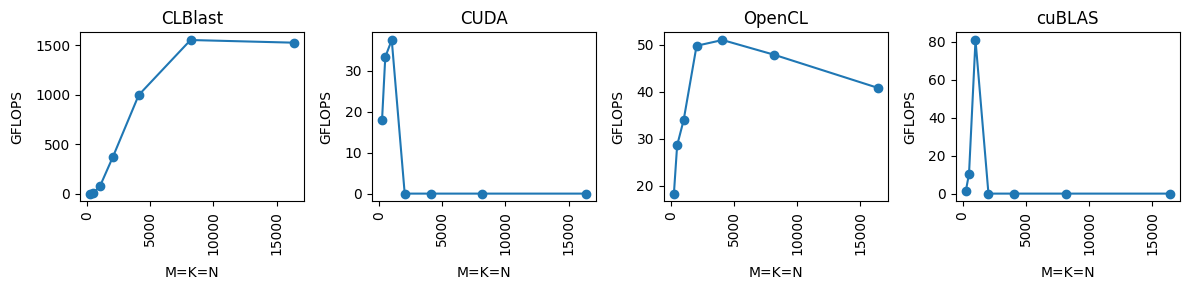

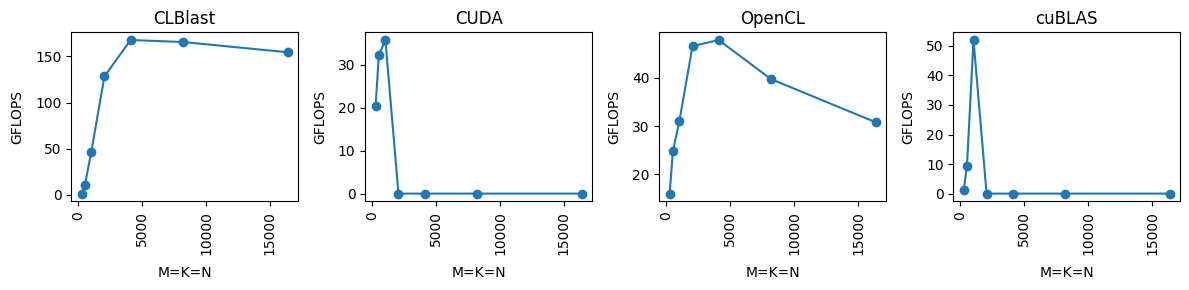

In [28]:
plot_bench(data_cpu_float, figsize=(6, 3), xtitle="M=K=N")
plot_bench(data_cpu_double, figsize=(6, 3), xtitle="M=K=N")

plot_bench(data_gpu_float, figsize=(12, 3), xtitle="M=K=N")
plot_bench(data_gpu_double, figsize=(12, 3), xtitle="M=K=N")